H2.1 Logistic regression
========================

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

### (b) Logistic regression by gradient ascent algorithm

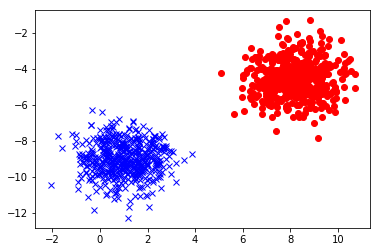

In [73]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=3)
plt.plot(X[y==0,0], X[y==0, 1], 'bx', X[y==1, 0], X[y==1, 1], 'ro')

In [83]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, theta):
    h = np.dot(X, theta)
    return np.sum(y * h - np.log(1 + np.exp(h)))

def logistic_regression(X, y, eta, alpha):
    intercept = np.ones((X.shape[0], 1))
    X = np.hstack((intercept, X))
    theta = np.zeros(X.shape[1])
    for step in range(eta):
        h = np.dot(X, theta)
        predictions = sigmoid(h)
        loss = y - predictions
        gradient = np.dot(X.T, loss)
        theta = theta + alpha * gradient
    return theta

def predict(x, theta):
    y_hat = theta[0]
    for i in range(len(x)- 1):
        y_hat += theta[i + 1] * x[i]
    return sigmoid(y_hat)

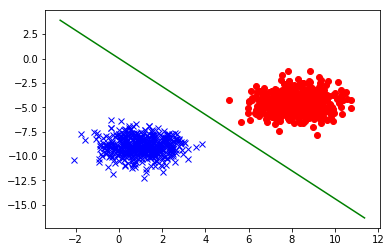

In [75]:
weights = logistic_regression(X, y, 1000, 0.001)

plt.plot(X[y==0,0], X[y==0, 1], 'bx', X[y==1, 0], X[y==1, 1], 'ro')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = -(weights[1]/weights[2]) * x_vals - weights[0]/weights[2]
plt.plot(x_vals, y_vals, 'g-')
plt.show()

### (c) logistic regression for MNIST

In [77]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib.pyplot as plt
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target
X0 = X[y == 0, :]
X1 = X[y == 1, :]
train_X = np.concatenate((X0[:100], X1[:100]))
test_X = np.concatenate((X0[4000:4050], X1[4000:4050]))
train_y = np.concatenate((np.zeros(100), np.ones(100)))
test_y = np.concatenate((np.zeros(50), np.ones(50)))


In [87]:
weights = logistic_regression(train_X, train_y, 1000, 0.001)
scores = 0
for i in range(len(test_X)):
    if test_y[i] == predict(test_X[i], weights):
        scores += 1
print("The accuracy of classifier with logistic regression: {0}%".format(scores*100/len(test_y)))

The accuracy of classifier with logistic regression: 100.0%


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
